In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from linearmodels.panel import PanelOLS



In [3]:
# Importing All Data
facility = pd.read_csv("/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/facility.csv",low_memory=False) 

facility_df=facility.copy()


In [10]:
#facility_df['DATADATE'] = pd.to_datetime(facility_df['FACILITYSTARTDATE'].astype(str), format='%Y%m%d')

mm=facility.sort_values(by='FACILITYAMT')
mm[['FACILITYAMT','FACILITYID']]

,FACILITYAMT,FACILITYID
22344,0.000000e+00,111464
22367,0.000000e+00,112884
8272,1.000000e+04,62278
19838,4.023500e+04,86543
4215,4.586499e+04,54714
...,...,...
18386,2.500000e+10,83269
57269,3.000000e+10,216333
88306,4.900000e+10,309099
33057,NaN,152631


In [4]:
# Specify the path to your Excel file
file_path = '/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/dealscan_compustate_linktable.xlsx'

# Specify the sheet name
sheet_name = 'link_data'

# Read the specified sheet
deal = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the dataframe



In [5]:
deal.rename(columns={'facid':'FACILITYID','gvkey':'GVKEY','facstartdate':'FACILITYSTARTDATE','bcoid':'BORROWERCOMPANYID'},inplace=True)
dealscan=deal[['GVKEY','FACILITYID']].copy()


In [6]:
print(facility_df['FACILITYID'].nunique())



91118


In [7]:
facility_df[facility_df['FACILITYAMT']<=0]



,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,FACILITYSTARTDATE,LCLIMIT,LOANTYPE,MATURITY,PRIMARYPURPOSE,RENEWAL,SECONDARYPURPOSE,SECURED,SENIORITY,TARGETCOMPANY
22344,13770,111464,89657,NaN,NaN,Inter-American Development Bank,NaN,USA,Taiwan Dollars,Syndication,...,19980428,NaN,FRN (Loan-Style),61.0,Corp. purposes,NaN,NaN,No,Senior,NaN
22367,13795,112884,90808,NaN,NaN,Coca-Cola Amatil Ltd,NaN,USA,Australia Dollars,Syndication,...,19981116,NaN,Standby Letter of Credit,12.0,Corp. purposes,NaN,NaN,No,Senior,NaN


In [8]:
facility_df[facility_df['MATURITY']<=0]



,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,FACILITYSTARTDATE,LCLIMIT,LOANTYPE,MATURITY,PRIMARYPURPOSE,RENEWAL,SECONDARYPURPOSE,SECURED,SENIORITY,TARGETCOMPANY
22386,13770,113968,91823,NaN,NaN,Inter-American Development Bank,NaN,USA,New Zealand Dollars,Public Underwriting,...,19990201,NaN,Fixed-Rate Bond,0.0,Corp. purposes,NaN,NaN,No,Senior,NaN


In [9]:
facility_df[facility_df['BORROWERCOMPANYID']==1]

,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,FACILITYSTARTDATE,LCLIMIT,LOANTYPE,MATURITY,PRIMARYPURPOSE,RENEWAL,SECONDARYPURPOSE,SECURED,SENIORITY,TARGETCOMPANY


In [10]:
lenderinfo_df=pd.read_csv("/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/lender_information.csv", encoding = "ISO-8859-1")

lenderinfo_df['PUBLICPRIVATE'].unique()


array(['Private', 'Public', nan], dtype=object)

In [11]:
lenderinfo_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148318 entries, 0 to 148317
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   COMPANYID         148318 non-null  int64  
 1   TICKER            12803 non-null   object 
 2   CITY              72864 non-null   object 
 3   COMPANY           148318 non-null  object 
 4   COUNTRY           148317 non-null  object 
 5   INSTITUTIONTYPE   98933 non-null   object 
 6   PARENTID          22294 non-null   float64
 7   PRIMARYSICCODE    112556 non-null  float64
 8   PUBLICPRIVATE     80286 non-null   object 
 9   REGION            145430 non-null  object 
 10  SALES             19680 non-null   float64
 11  SECONDARYSICCODE  18423 non-null   float64
 12  STATE             43532 non-null   object 
 13  TERTIARYSICCODE   7760 non-null    float64
 14  ULTIMATEPARENTID  148272 non-null  float64
 15  ZIPCODE           50606 non-null   object 
dtypes: float64(6), int64

In [12]:
lendershare_df=pd.read_csv("/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/lendershares.csv", encoding = "ISO-8859-1")

lendershare_df


,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT
0,19735,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes
1,19738,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes
2,20145,8980,Mitsui Leasing USA,Agent,100.0,Yes,Yes
3,24511,2446,Union Bank NA,Participant,NaN,No,No
4,24511,5893,Citibank,Participant,NaN,No,No
...,...,...,...,...,...,...,...
521221,443363,30255,UBS AG,Admin agent,NaN,Yes,Yes
521222,445060,100864,First Bank of Highland Park,Participant,NaN,No,No
521223,445060,123561,Private Bank & Trust Co,Admin agent,NaN,Yes,Yes
521224,445061,100864,First Bank of Highland Park,Participant,NaN,No,No


In [13]:
lendershare_df[lendershare_df['FACILITYID']==445061]



,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT
521224,445061,100864,First Bank of Highland Park,Participant,NaN,No,No
521225,445061,123561,Private Bank & Trust Co,Admin agent,NaN,Yes,Yes


In [14]:
lendershare_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521226 entries, 0 to 521225
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FACILITYID          521226 non-null  int64  
 1   COMPANYID           521226 non-null  int64  
 2   LENDER              521226 non-null  object 
 3   LENDERROLE          521226 non-null  object 
 4   BANKALLOCATION      142075 non-null  float64
 5   AGENTCREDIT         520905 non-null  object 
 6   LEADARRANGERCREDIT  521166 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.8+ MB


In [15]:
lender_merge=pd.merge(lendershare_df,lenderinfo_df,on='COMPANYID',how='inner')
lender_merge[['FACILITYID','COMPANYID']].nunique()

FACILITYID    90968
COMPANYID      6681
dtype: int64

In [16]:
lender_merge.duplicated().any()



False

In [17]:
lendershare_df[lendershare_df['FACILITYID']==116892]



,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT
135763,116892,78248,HSBC Markets,Arranger,NaN,Yes,Yes


In [18]:
facility_df[facility_df['FACILITYID']==116892]



,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,FACILITYSTARTDATE,LCLIMIT,LOANTYPE,MATURITY,PRIMARYPURPOSE,RENEWAL,SECONDARYPURPOSE,SECURED,SENIORITY,TARGETCOMPANY
22417,5889,116892,94204,NaN,NaN,Chase Manhattan Bank,NaN,USA,Hong Kong Dollars,Private Placement,...,19990802,NaN,Fixed-Rate CD,36.0,Corp. purposes,NaN,NaN,No,Senior,NaN


In [19]:
package_df=pd.read_csv('/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/package.csv', encoding = "ISO-8859-1")

package_df

,BORROWERCOMPANYID,PACKAGEID,TICKER,ACTIVE,AGENTCONSENT,ASSETSALESSWEEP,ASSIGNMENTFEE,ASSIGNMENTMIN,ASSIGNMENTRESTRICTIONS,COLLATERALRELEASE,...,INSURANCEPROCEEDSSWEEP,PERCENTAGEOFEXCESSCF,PERCENTAGEOFNETINCOME,PRORATAALLOCATION,PROJECTFINANCETYPE,REFINANCINGINDICATOR,REQUIREDLENDERS,SALESATCLOSE,SPREADOVERDEFAULTBASE,TERMCHANGES
0,33181,100,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.760000e+07,NaN,NaN
1,3769,101,SGAL,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.760000e+07,NaN,NaN
2,1,102,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.493370e+08,NaN,NaN
3,2,103,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.694820e+08,NaN,NaN
4,2,104,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.694820e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268986,33150,307076,WEIR.L,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,Yes,NaN,3.213300e+10,NaN,NaN
268987,166781,307077,HMb.ST,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,2.494775e+10,NaN,NaN
268988,33150,307078,WEIR.L,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,NaN,Yes,NaN,3.213300e+10,NaN,NaN
268989,143603,307079,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268991 entries, 0 to 268990
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BORROWERCOMPANYID       268991 non-null  int64  
 1   PACKAGEID               268991 non-null  int64  
 2   TICKER                  67751 non-null   object 
 3   ACTIVE                  268986 non-null  object 
 4   AGENTCONSENT            27558 non-null   object 
 5   ASSETSALESSWEEP         13729 non-null   float64
 6   ASSIGNMENTFEE           24836 non-null   float64
 7   ASSIGNMENTMIN           25469 non-null   float64
 8   ASSIGNMENTRESTRICTIONS  0 non-null       float64
 9   COLLATERALRELEASE       13500 non-null   float64
 10  COMPANY                 268991 non-null  object 
 11  COMPANYCONSENT          27551 non-null   object 
 12  COMMENT                 60800 non-null   object 
 13  CURRENCY                268991 non-null  object 
 14  DEALACTIVEDATE      

In [21]:
perf_df=pd.read_csv('/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/performancepricing.csv')

perf_df



,FacilityID,RowOrder,PerformancePricingType,LIBOR
0,1434,1,Maturity,75.0
1,1434,2,Maturity,87.5
2,6694,1,Leverage,100.0
3,6694,1,Senior Debt Rating,100.0
4,6694,2,Leverage,75.0
...,...,...,...,...
137611,445471,1,Total Debt to Cash Flow,500.0
137612,445471,2,Total Debt to Cash Flow,475.0
137613,445471,3,Total Debt to Cash Flow,450.0
137614,445471,4,Total Debt to Cash Flow,425.0


In [5]:

facility['FACILITYAMT'].sort_values()


22344    0.000000e+00
22367    0.000000e+00
8272     1.000000e+04
19838    4.023500e+04
4215     4.586499e+04
             ...     
18386    2.500000e+10
57269    3.000000e+10
88306    4.900000e+10
33057             NaN
33058             NaN
Name: FACILITYAMT, Length: 91118, dtype: float64

In [22]:
pricing_df=pd.read_csv('/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/pricing.csv', encoding = "ISO-8859-1")

pricing_df

,FACILITYID,BASERATE,FEE,MINBPS,MAXBPS,ALLINDRAWN,ALLINUNDRAWN
0,1,Fixed Rate,NaN,1325.0,1325.0,NaN,NaN
1,1,NaN,Upfront Fee,10.0,10.0,NaN,NaN
2,1,NaN,Upfront Regular Fee,10.0,10.0,NaN,NaN
3,2,Prime,NaN,150.0,150.0,405.0,NaN
4,2,NaN,Upfront Fee,10.0,10.0,405.0,NaN
...,...,...,...,...,...,...,...
669317,446868,NaN,Upfront Fee,175.0,175.0,425.0,NaN
669318,446868,NaN,Upfront Regular Fee,175.0,175.0,425.0,NaN
669319,446869,BBSY,NaN,450.0,450.0,450.0,NaN
669320,446869,NaN,Upfront Fee,175.0,175.0,450.0,NaN


In [23]:
covenant_df=pd.read_csv('/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/covenants.csv')

covenant_df

,PackageID,CovenantType
0,4106,Min. Current Ratio
1,4106,Min. Interest Coverage
2,4812,Min. Current Ratio
3,4952,Max. Debt to EBITDA
4,5223,Max. Senior Debt to EBITDA
...,...,...
80856,306895,Max. Debt to EBITDA
80857,306986,Max. Debt to Equity
80858,306986,Min. Interest Coverage
80859,307026,Max. Debt to EBITDA


In [12]:
comp2=pd.read_csv('/Users/shaghayeghhosseinghanemi/Desktop/My Classes/financial institutions/comp.csv',parse_dates=['DATADATE'], low_memory=False)



In [36]:
mm=comp2[comp2['CONM'] == 'BIOLINE RX LTD']
mm[['SALE','AT','NI','DLC','PSTKL']]

,SALE,AT,NI,DLC,PSTKL
73029,0.0,29.344,-13.189,0.081,0.0
73030,0.0,24.377,-20.475,0.037,0.0


In [ ]:
,'SALE','DLC','PSTKL']], S

## keep the columns that are needed

In [25]:


#comp=comp2[['GVKEY','DATADATE','SIC','FYEAR','CONM','AT','PRCC_F','CSHO','DLTT','DLC','PSTKL','PSTK','TXDITC','OIBDP','PPENT','NI','LT','EBIT','SALE','WCAP','RE','CEQ','OANCF', 'IVNCF', 'FINCF']].copy()




## INDUSTRY FILTERING

In [26]:
filtered_comp=comp2[['GVKEY','DATADATE','SIC','FYEAR','CONM','AT','PRCC_F','CSHO','DLTT','DLC','PSTKL','PSTK','TXDITC','OIBDP','PPENT','NI','LT','EBIT','SALE','WCAP','RE','CEQ','OANCF', 'IVNCF', 'FINCF']].copy()
#filtered=comp[['GVKEY','DATADATE','SIC','FYEAR','CONM','Ln_TotalAssets','Market_to_book','Leverage','ROA','Tangibility','Altman_Z_Score','OANCF', 'IVNCF', 'FINCF']].copy()
#filtered_comp = filtered[(filtered['SIC'] >= 1000) & (filtered['SIC'] <= 1499)|(filtered['SIC'] >= 2000) & (filtered['SIC'] <= 3999)]




In [27]:
facility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91118 entries, 0 to 91117
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BORROWERCOMPANYID     91118 non-null  int64  
 1   FACILITYID            91118 non-null  int64  
 2   PACKAGEID             91118 non-null  int64  
 3   TICKER                27543 non-null  object 
 4   AVERAGELIFE           7560 non-null   float64
 5   COMPANY               91118 non-null  object 
 6   CONVERSIONDATE        370 non-null    float64
 7   COUNTRYOFSYNDICATION  91118 non-null  object 
 8   CURRENCY              91118 non-null  object 
 9   DISTRIBUTIONMETHOD    90829 non-null  object 
 10  EXCHANGERATE          91118 non-null  float64
 11  FACILITYAMT           91116 non-null  float64
 12  FACILITYENDDATE       91118 non-null  int64  
 13  FACILITYSTARTDATE     91118 non-null  int64  
 14  LCLIMIT               0 non-null      float64
 15  LOANTYPE           

In [28]:

# Convert IDs to categorical variables
#facility_df[['BORROWERCOMPANYID', 'FACILITYID', 'PACKAGEID']] = facility_df[['BORROWERCOMPANYID', 'FACILITYID', 'PACKAGEID']].astype(str)
#lendershare_df[['FACILITYID', 'COMPANYID']] = lendershare_df[['FACILITYID', 'COMPANYID']].astype(str)
#lenderinfo_df['COMPANYID'] = lenderinfo_df['COMPANYID'].astype(str)
#pricing_df['FACILITYID'] = pricing_df['FACILITYID'].astype(str)
#perf_df['FacilityID'] = perf_df['FacilityID'].astype(str)
#filtered_comp['GVKEY'] = filtered_comp['GVKEY'].astype(str)

# Handle missing values
# Drop rows where 'ALLINDRAWN' is NaN in pricing_df
pricing_df.dropna(subset=['ALLINDRAWN'], inplace=True)


# Create dummy variables for 'SECURED'
# Assuming 'Yes' means secured and 'No' means not secured
facility_df['Secured_dummy'] = (facility_df['SECURED'] == 'Yes').astype(int)  # 1 for Secured, 0 for Not Secured

# Handle missing values in 'SECURED' by creating an unknown category if needed
facility_df['Secured_dummy'].fillna(-1, inplace=True)  # -1 for Unknown/Missing
# The loan types of interest
target_loans = ['Revolver/Line < 1 Yr.', 'Revolver/Line >= 1 Yr.']

# Create a dummy variable where 1 indicates one of the target loan types, 0 otherwise
facility_df['Revolver'] = facility_df['LOANTYPE'].apply(lambda x: 1 if x in target_loans else 0)



In [29]:


# Count unique lenders per facility
#number_of_lenders = lendershare_df.groupby('FACILITYID')['COMPANYID'].nunique().reset_index(name='NumLenders')
#number_of_lenders

In [30]:
# Count number of lenders per facility and calculate log
#number_of_lenders = lendershare_df.groupby('FACILITYID').size().reset_index(name='NumLenders')
# Assuming facility_df and number_of_lenders are already defined
# Count unique lenders per facility
number_of_lenders = lendershare_df.groupby('FACILITYID')['COMPANYID'].nunique().reset_index(name='NumLenders')
# Exclude zero values before taking logarithms
facility_df = facility_df[facility_df['FACILITYAMT'] > 0]
facility_df = facility_df[facility_df['MATURITY'] > 0]

# Taking logarithms of non-zero values
facility_df['FacilityAmount(m)'] = facility_df['FACILITYAMT']/1000000
facility_df['Ln_Facility_Amount'] = np.log(facility_df['FacilityAmount(m)'])
facility_df['Ln_Maturity'] = np.log(facility_df['MATURITY'])

# Ensure there are no zero lenders before logging
number_of_lenders = number_of_lenders[number_of_lenders['NumLenders'] > 0]
number_of_lenders['Ln_Number_of_Lenders'] = np.log(number_of_lenders['NumLenders'])

# Merge back to the facility_df
facility_df = facility_df.merge(number_of_lenders, on='FACILITYID', how='left')


In [31]:
# Get a mapping of FACILITYID to COMPANYID (assuming COMPANYID represents the borrower)
facility_to_company_mapping = lendershare_df[['FACILITYID', 'COMPANYID']].drop_duplicates()

# Optionally, if there are multiple COMPANYIDs per FACILITYID, decide how to handle:
# (This step depends on the specifics of your data. For example, you might want to keep only one COMPANYID per FACILITYID or handle it differently based on your requirements)
facility_to_company_mapping = facility_to_company_mapping.groupby('FACILITYID').first().reset_index()


In [32]:
# Merge COMPANYID mapping into facility_df
facility_df = facility_df.merge(facility_to_company_mapping, on='FACILITYID', how='left')


In [33]:
# Merge with performance pricing data
perf_df.rename(columns={'FacilityID':'FACILITYID'}, inplace=True)
facility_df = facility_df.merge(perf_df, on='FACILITYID', how='left')

# Create a dummy for Performance Pricing
facility_df['PerformancePricing_dummy'] = facility_df['PerformancePricingType'].notnull().astype(int)


In [34]:
facility_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162619 entries, 0 to 162618
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BORROWERCOMPANYID         162619 non-null  int64  
 1   FACILITYID                162619 non-null  int64  
 2   PACKAGEID                 162619 non-null  int64  
 3   TICKER                    68102 non-null   object 
 4   AVERAGELIFE               18891 non-null   float64
 5   COMPANY                   162619 non-null  object 
 6   CONVERSIONDATE            1037 non-null    float64
 7   COUNTRYOFSYNDICATION      162619 non-null  object 
 8   CURRENCY                  162619 non-null  object 
 9   DISTRIBUTIONMETHOD        162207 non-null  object 
 10  EXCHANGERATE              162619 non-null  float64
 11  FACILITYAMT               162619 non-null  float64
 12  FACILITYENDDATE           162619 non-null  int64  
 13  FACILITYSTARTDATE         162619 non-null  i

In [35]:
# Perform the merge operation with explicit suffixes
#filtered_comp = pd.merge(filtered_comp, cf_volatility, on='GVKEY', how='left', suffixes=('_left', '_right'))

# Now, you can rename or drop the duplicated columns

# Or, to drop the duplicated columns
#filtered_comp.drop(['DATADATE_right', 'AT_right', 'PRCC_F_right', 'CSHO_right', 'DLTT_right', 'DLC_right', 'PSTKL_right', 'PSTK_right', 'TXDITC_right', 'OIBDP_right', 'PPENT_right', 'NI_right', 'LT_right', 'EBIT_right', 'SALE_right', 'WCAP_right', 'RE_right', 'CEQ_right', 'OANCF_right', 'IVNCF_right', 'FINCF_right', 'Ln_TotalAssets_right', 'Leverage_right', 'ROA_right', 'Market_to_book_right', 'Tangibility_right', 'Altman_z_score_right', 'Total_CF_right', 'CF_Volatility_right'], axis=1, inplace=True)



# Applying conditions and calculations correctly
filtered_comp.loc[filtered_comp['AT'] <= 0, 'AT'] = np.nan
filtered_comp.loc[filtered_comp['DLC'] < 0, 'DLC'] = np.nan
filtered_comp.loc[filtered_comp['PSTKL'] < 0, 'PSTKL'] = np.nan
filtered_comp.loc[filtered_comp['SALE'] < 0, 'SALE'] = np.nan

# Add financial ratios calculations
filtered_comp.loc[:, 'Ln_TotalAssets'] = np.log(filtered_comp['AT'].replace(0, np.nan))
filtered_comp.loc[:, 'Leverage'] = filtered_comp['DLTT'] / filtered_comp['AT']
filtered_comp.loc[:, 'ROA'] = filtered_comp['NI'] / filtered_comp['AT']
filtered_comp.loc[:, 'Market_to_book'] = (filtered_comp['PRCC_F'] * filtered_comp['CSHO']) / filtered_comp['CEQ']
filtered_comp.loc[:, 'Tangibility'] = (filtered_comp['PPENT']/filtered_comp['AT'])
filtered_comp.loc[:, 'Altman_z_score'] = (1.2* filtered_comp['WCAP']/filtered_comp['AT']) + (1.4*filtered_comp['RE']/filtered_comp['AT']) + (3.3*filtered_comp['EBIT']/filtered_comp['AT']) + (0.6*filtered_comp['CSHO']*filtered_comp['PRCC_F']/filtered_comp['LT']) + (filtered_comp['SALE']/filtered_comp['AT'])

# Calculate the total cash flow by summing the three components
filtered_comp['Total_CF'] = filtered_comp['OANCF'] + filtered_comp['IVNCF'] + filtered_comp['FINCF']

cf_volatility = filtered_comp.groupby(['GVKEY', 'FYEAR'])['Total_CF'].sum().groupby('GVKEY').std().reset_index()
cf_volatility.rename(columns={'Total_CF': 'CF_Volatility'}, inplace=True)

# Merge the volatility data back to the main DataFrame
filtered_comp = pd.merge(filtered_comp, cf_volatility, on='GVKEY', how='left', suffixes=('','_drop'))
filtered_comp.drop([col for col in filtered_comp.columns if 'drop' in col], axis=1, inplace=True)

# Display information about the DataFrame
print(filtered_comp.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73062 entries, 0 to 73061
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   GVKEY           73062 non-null  int64         
 1   DATADATE        73062 non-null  datetime64[ns]
 2   SIC             73062 non-null  int64         
 3   FYEAR           73062 non-null  int64         
 4   CONM            73062 non-null  object        
 5   AT              65961 non-null  float64       
 6   PRCC_F          73050 non-null  float64       
 7   CSHO            72932 non-null  float64       
 8   DLTT            65779 non-null  float64       
 9   DLC             65878 non-null  float64       
 10  PSTKL           65760 non-null  float64       
 11  PSTK            65868 non-null  float64       
 12  TXDITC          56190 non-null  float64       
 13  OIBDP           63921 non-null  float64       
 14  PPENT           63861 non-null  float64       
 15  NI

In [36]:
pricing_df

,FACILITYID,BASERATE,FEE,MINBPS,MAXBPS,ALLINDRAWN,ALLINUNDRAWN
3,2,Prime,NaN,150.0,150.0,405.0,NaN
4,2,NaN,Upfront Fee,10.0,10.0,405.0,NaN
5,2,NaN,Upfront Regular Fee,10.0,10.0,405.0,NaN
6,3,Prime,NaN,175.0,175.0,430.0,NaN
7,3,NaN,Upfront Fee,10.0,10.0,430.0,NaN
...,...,...,...,...,...,...,...
669317,446868,NaN,Upfront Fee,175.0,175.0,425.0,NaN
669318,446868,NaN,Upfront Regular Fee,175.0,175.0,425.0,NaN
669319,446869,BBSY,NaN,450.0,450.0,450.0,NaN
669320,446869,NaN,Upfront Fee,175.0,175.0,450.0,NaN


In [37]:
facility_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162619 entries, 0 to 162618
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BORROWERCOMPANYID         162619 non-null  int64  
 1   FACILITYID                162619 non-null  int64  
 2   PACKAGEID                 162619 non-null  int64  
 3   TICKER                    68102 non-null   object 
 4   AVERAGELIFE               18891 non-null   float64
 5   COMPANY                   162619 non-null  object 
 6   CONVERSIONDATE            1037 non-null    float64
 7   COUNTRYOFSYNDICATION      162619 non-null  object 
 8   CURRENCY                  162619 non-null  object 
 9   DISTRIBUTIONMETHOD        162207 non-null  object 
 10  EXCHANGERATE              162619 non-null  float64
 11  FACILITYAMT               162619 non-null  float64
 12  FACILITYENDDATE           162619 non-null  int64  
 13  FACILITYSTARTDATE         162619 non-null  i

In [38]:
deal_comp=pd.merge(dealscan,filtered_comp, on='GVKEY', how='inner')
# Ensure no infinite or NaN values interfere in the dataset
deal_comp.replace([np.inf, -np.inf], np.nan, inplace=True)

deal_comp.reset_index()
deal_comp

,GVKEY,FACILITYID,DATADATE,SIC,FYEAR,CONM,AT,PRCC_F,CSHO,DLTT,...,IVNCF,FINCF,Ln_TotalAssets,Leverage,ROA,Market_to_book,Tangibility,Altman_z_score,Total_CF,CF_Volatility
0,12826,11,2001-12-31,1400,2001,HANSON PLC,10111.748,33.62,147.175,2325.863,...,369.683,-500.570,9.221453,0.230016,0.040098,1.250493,0.411822,1.313037,555.979,512.200551
1,12826,11,2002-12-31,1400,2002,HANSON PLC,10940.415,22.18,147.394,1564.916,...,-918.864,196.681,9.300219,0.143040,0.027569,0.763548,0.384735,1.052553,105.905,512.200551
2,12826,11,2003-12-31,1400,2003,HANSON PLC,11901.685,36.50,147.394,2615.459,...,-613.586,-149.516,9.384435,0.219755,0.026969,1.107585,0.384238,1.940430,91.351,512.200551
3,12826,11,2004-12-31,1400,2004,HANSON PLC,12027.115,42.93,146.124,2027.702,...,-310.200,-751.264,9.394919,0.168594,0.030842,1.201447,0.388724,2.105737,-89.094,512.200551
4,12826,11,2005-12-31,1400,2005,HANSON PLC,11132.152,54.90,144.457,1996.558,...,-787.211,-648.847,9.317593,0.179351,0.059845,1.728122,0.422345,2.227938,-626.159,512.200551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690860,24949,378040,2005-12-31,6726,2005,BLACKROCK INSD MUN TM TR INC,NaN,10.36,25.886,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
690861,24949,378040,2006-12-31,6726,2006,BLACKROCK INSD MUN TM TR INC,NaN,9.77,25.886,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
690862,24949,378040,2007-12-31,6726,2007,BLACKROCK INSD MUN TM TR INC,NaN,9.90,25.886,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
690863,24949,378040,2008-12-31,6726,2008,BLACKROCK INSD MUN TM TR INC,NaN,10.16,25.886,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [39]:
facility_df=facility_df.merge(deal_comp,on='FACILITYID',how='left')

#pricing_df.drop_duplicates(subset=['FACILITYID'],inplace=True)
facility_df.drop(columns=['AT','PRCC_F','CSHO','DLTT','DLC','PSTKL','PSTK','TXDITC','OIBDP','PPENT','NI','LT','EBIT','SALE','WCAP','RE','CEQ','OANCF', 'IVNCF', 'FINCF'],axis=1,inplace=True)





In [40]:



facility_df=facility_df.merge(pricing_df, on='FACILITYID', how='left', suffixes=('','_drop'))
facility_df.drop([col for col in facility_df.columns if 'drop' in col], axis=1, inplace=True)



In [41]:
facility_df.drop_duplicates(subset=['FACILITYID'],inplace=True)

facility_df

,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,Tangibility,Altman_z_score,Total_CF,CF_Volatility,BASERATE,FEE,MINBPS,MAXBPS,ALLINDRAWN,ALLINUNDRAWN
0,14908,19735,14578,NaN,NaN,CenCall Communications Corp,NaN,USA,United States Dollars,NaN,...,NaN,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN
6,14908,19738,14578,NaN,NaN,CenCall Communications Corp,NaN,USA,United States Dollars,NaN,...,NaN,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN
12,2015,20145,14840,KOIL,NaN,Kelley Oil Corp,NaN,USA,United States Dollars,Sole Lender,...,NaN,NaN,NaN,NaN,LIBOR,NaN,200.0,200.0,200.0,NaN
14,10909,24511,18185,NaN,NaN,Homedco Group,NaN,USA,United States Dollars,Syndication,...,0.305818,3.975217,-7.505,74.7562,LIBOR,NaN,125.0,125.0,125.0,NaN
21,18232,28551,21170,NaN,NaN,Kumtor Gold Co,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658989,37025,434279,299626,NaN,NaN,Shamrock Foods,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,LIBOR,NaN,150.0,150.0,150.0,22.5
4658992,95253,442576,304782,JBLU.O,NaN,JetBlue Airways Corp,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,LIBOR,NaN,375.0,375.0,375.0,NaN
4658993,187829,443363,305342,NaN,NaN,CM Finance SPV Ltd,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4658994,188114,445060,306448,NaN,NaN,BCH Pineridge LLC,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
filtered_df=facility_df[['SIC','FACILITYID','LOANTYPE','Ln_Maturity','BORROWERCOMPANYID','DATADATE','ALLINDRAWN','Ln_Facility_Amount','Secured_dummy','PerformancePricing_dummy','Ln_Number_of_Lenders','Ln_TotalAssets','Market_to_book','Leverage','ROA','Tangibility','Altman_z_score','CF_Volatility','Revolver','FACILITYAMT','FacilityAmount(m)', 'MATURITY', 'NumLenders']].copy()



In [43]:
#facility_df.drop_duplicates(subset=['FACILITYID'],inplace=True)



In [44]:
facility_df['SIC']



0             NaN
6             NaN
12            NaN
14         3841.0
21            NaN
            ...  
4658989       NaN
4658992       NaN
4658993       NaN
4658994       NaN
4658995       NaN
Name: SIC, Length: 90974, dtype: float64

In [45]:
#filtered_df=data_cov[['SIC','FACILITYID','FacilityAmount(m)','LOANTYPE','Ln_Maturity','BORROWERCOMPANYID','DATADATE','ALLINDRAWN','Ln_Facility_Amount','Secured_dummy','PerformancePricing_dummy','Ln_Number_of_Lenders','Ln_TotalAssets','Market_to_book','Leverage','ROA','Tangibility','Altman_z_score','CF_Volatility','Revolver','FACILITYAMT', 'MATURITY', 'NumLenders']].copy()




In [46]:
# Filter for mining and manufacturing industries
mining_df = filtered_df[(filtered_df['SIC'] >= 1000) & (filtered_df['SIC'] <= 1499)]
manufacturing_df = filtered_df[(filtered_df['SIC'] >= 2000) & (filtered_df['SIC'] <= 3999)]

In [47]:
mining_df



,SIC,FACILITYID,LOANTYPE,Ln_Maturity,BORROWERCOMPANYID,DATADATE,ALLINDRAWN,Ln_Facility_Amount,Secured_dummy,PerformancePricing_dummy,...,Leverage,ROA,Tangibility,Altman_z_score,CF_Volatility,Revolver,FACILITYAMT,FacilityAmount(m),MATURITY,NumLenders
4003,1400.0,44622,Revolver/Line >= 1 Yr.,4.094345,24776,2001-12-31,32.5,5.010635,0,1,...,0.358443,0.047363,0.486469,2.725932,101.595523,1,1.500000e+08,150.0,60.0,6.0
7213,1311.0,45249,Revolver/Line >= 1 Yr.,4.094345,23746,2001-12-31,250.0,5.075174,0,0,...,0.482201,0.030570,0.857772,0.642333,160.362277,1,1.600000e+08,160.0,60.0,2.0
9693,1311.0,45380,Revolver/Line >= 1 Yr.,4.094345,18680,2001-12-31,162.5,5.991465,1,1,...,0.574729,0.025881,0.808158,0.622441,6.984603,1,4.000000e+08,400.0,60.0,11.0
15176,1311.0,45687,Revolver/Line >= 1 Yr.,3.583519,19282,2001-12-31,NaN,4.605170,0,0,...,0.414196,0.044339,0.759237,1.193764,445.772700,1,1.000000e+08,100.0,36.0,1.0
16009,1311.0,45695,364-Day Facility,2.484907,17313,2001-12-31,NaN,5.298317,0,0,...,0.327962,0.058993,0.720767,2.122707,372.305766,0,2.000000e+08,200.0,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654172,1311.0,316416,Revolver/Line >= 1 Yr.,3.583519,2147,2001-12-31,150.0,7.244228,1,0,...,0.107515,0.094346,0.874797,4.339956,5.505155,1,1.400000e+09,1400.0,36.0,6.0
4655123,1040.0,317192,Revolver/Line >= 1 Yr.,3.332205,140316,2007-12-31,450.0,3.688879,1,0,...,0.000113,-0.105761,0.726956,23.207606,105.598626,1,4.000000e+07,40.0,28.0,1.0
4655828,1311.0,317941,Revolver/Line >= 1 Yr.,3.332205,131241,2006-12-31,325.0,5.579730,1,1,...,0.000000,-0.356138,0.388838,131.946796,18.352971,1,2.650000e+08,265.0,28.0,13.0
4657395,1311.0,332585,Revolver/Line >= 1 Yr.,4.094345,122745,2007-12-31,250.0,7.090077,1,0,...,0.285107,0.020194,0.816823,NaN,3.858037,1,1.200000e+09,1200.0,60.0,19.0


In [48]:
manufacturing_df



,SIC,FACILITYID,LOANTYPE,Ln_Maturity,BORROWERCOMPANYID,DATADATE,ALLINDRAWN,Ln_Facility_Amount,Secured_dummy,PerformancePricing_dummy,...,Leverage,ROA,Tangibility,Altman_z_score,CF_Volatility,Revolver,FACILITYAMT,FacilityAmount(m),MATURITY,NumLenders
14,3841.0,24511,Term Loan,3.178054,10909,2001-12-31,125.0,4.317488,0,0,...,0.399887,0.103361,0.305818,3.975217,74.756200,0,7.500000e+07,75.00,24.0,12.0
3599,3561.0,44002,Term Loan,4.094345,23196,2001-12-31,30.0,4.639572,0,0,...,0.101233,0.061374,0.175450,2.540981,404.652862,0,1.035000e+08,103.50,60.0,11.0
3671,3630.0,44089,364-Day Facility,2.484907,3349,2001-12-31,17.5,5.940171,0,0,...,0.185876,0.003014,0.294531,2.814864,383.443044,0,3.800000e+08,380.00,12.0,4.0
3707,3630.0,44090,Revolver/Line >= 1 Yr.,4.094345,3349,2001-12-31,22.5,7.326466,0,1,...,0.185876,0.003014,0.294531,2.814864,383.443044,1,1.520000e+09,1520.00,60.0,4.0
4307,3140.0,44852,Revolver/Line >= 1 Yr.,3.583519,15981,2002-01-31,175.0,5.043425,1,1,...,0.176190,-0.005653,0.122337,3.815497,35.007110,1,1.550000e+08,155.00,36.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658546,2082.0,359658,Term Loan A,4.094345,39400,2002-02-28,200.0,6.514713,1,0,...,0.421317,0.044446,0.188560,2.472704,186.784847,0,6.750000e+08,675.00,60.0,6.0
4658570,2082.0,359659,Term Loan,4.094345,39400,2002-02-28,200.0,6.481807,1,0,...,0.421317,0.044446,0.188560,2.472704,186.784847,0,6.531500e+08,653.15,60.0,7.0
4658642,2082.0,359660,Term Loan B,4.430817,39400,2002-02-28,200.0,7.174954,1,0,...,0.421317,0.044446,0.188560,2.472704,186.784847,0,1.306300e+09,1306.30,84.0,7.0
4658742,3728.0,360628,Term Loan,4.189655,25607,2002-03-31,162.5,5.926926,0,0,...,0.190126,0.063958,0.227774,2.984911,55.882015,0,3.750000e+08,375.00,66.0,11.0


In [49]:
mining_df.dropna(inplace=True)


/var/folders/wf/tw1fjh_n28d7y7w7s6nk5yvh0000gn/T/ipykernel_17424/3959426695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mining_df.dropna(inplace=True)


In [50]:
print('Mining Summary Statistics:')
mining_df[['ALLINDRAWN','FacilityAmount(m)','MATURITY','Secured_dummy','PerformancePricing_dummy','NumLenders','Revolver']].describe()



Mining Summary Statistics:


,ALLINDRAWN,FacilityAmount(m),MATURITY,Secured_dummy,PerformancePricing_dummy,NumLenders,Revolver
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,221.582344,486.475907,45.499182,0.584288,0.489907,8.312602,0.673759
std,167.484317,1013.491929,20.910553,0.492979,0.500035,7.738277,0.468965
min,10.000000,0.200000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,125.000000,75.000000,35.000000,0.000000,0.000000,3.000000,0.000000
50%,200.000000,200.000000,48.000000,1.000000,0.000000,6.000000,1.000000
75%,275.000000,500.000000,60.000000,1.000000,1.000000,11.000000,1.000000
max,1355.000000,24000.000000,174.000000,1.000000,1.000000,80.000000,1.000000


- In mining industry 
- The average of All-in-drawn is 2.24%. it means that on top of the lIBOR thet are charging this 2.24% more. 
- Usually the the amount of the loans are 460 million dollars.
- there are about 46 months for the maturity of the loans.
- about 56% of the loans are secured by collateral.
- 47% of them have some sort of performance pricing.
- On average in each facility the number of lenders are 8 people.
- 63% of the loans are credit lines.



In [51]:
mining_df['Ln_Maturity']

4003       4.094345
7213       4.094345
9693       4.094345
18039      3.178054
19918      4.094345
             ...   
4653857    2.484907
4654032    3.367296
4654172    3.583519
4655123    3.332205
4655828    3.332205
Name: Ln_Maturity, Length: 1833, dtype: float64

In [52]:
manufacturing_df['Ln_Maturity']

14         3.178054
3599       4.094345
3671       2.484907
3707       4.094345
4307       3.583519
             ...   
4658546    4.094345
4658570    4.094345
4658642    4.430817
4658742    4.189655
4658949    4.094345
Name: Ln_Maturity, Length: 14066, dtype: float64

In [53]:
mining_df['PerformancePricing_dummy']

4003       1
7213       0
9693       1
18039      1
19918      0
          ..
4653857    0
4654032    0
4654172    0
4655123    0
4655828    1
Name: PerformancePricing_dummy, Length: 1833, dtype: int64

In [54]:

manufacturing_df.dropna(inplace=True)



/var/folders/wf/tw1fjh_n28d7y7w7s6nk5yvh0000gn/T/ipykernel_17424/1340152242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_df.dropna(inplace=True)


In [55]:
print('Manufacturing Summary Statistics:')
manufacturing_df[['ALLINDRAWN','FacilityAmount(m)','MATURITY','Secured_dummy','PerformancePricing_dummy','NumLenders','Revolver']].describe()







Manufacturing Summary Statistics:


,ALLINDRAWN,FacilityAmount(m),MATURITY,Secured_dummy,PerformancePricing_dummy,NumLenders,Revolver
count,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000
mean,222.618510,340.334840,47.925699,0.602505,0.441207,7.587082,0.544479
std,158.647373,793.438267,23.269246,0.489401,0.496552,8.601716,0.498039
min,-95.000000,0.010000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,100.000000,35.000000,34.000000,0.000000,0.000000,2.000000,0.000000
50%,200.000000,125.000000,60.000000,1.000000,0.000000,5.000000,1.000000
75%,300.000000,350.000000,60.000000,1.000000,1.000000,10.000000,1.000000
max,1655.000000,30000.000000,241.000000,1.000000,1.000000,141.000000,1.000000


In manufacturing industry:
- The average of All-in-drawn is 2.24%. it means that on top of the lIBOR thet are charging this 2.24% more. 
- Usually the the amount of the loans are 360 million dollars.
- there are about 48 months for the maturity of the loans.
- about 58% of the loans are secured by collateral.
- 39% of them has some sort of performance pricing.
- On average in each facility the number of lenders are 7 people.
- 52% of the loans are credit lines.


-

In [56]:
manufacturing_df['Secured_dummy']

14         0
3599       0
3671       0
3707       0
4307       1
          ..
4658522    1
4658546    1
4658570    1
4658642    1
4658742    0
Name: Secured_dummy, Length: 11736, dtype: int64

In [57]:
import statsmodels.formula.api as smf
import pandas as pd

facility_df['Industry'] = facility_df['SIC'].astype('category')

# Run the regression without industry fixed effects
model_without_industry_FE = smf.ols(formula = 'ALLINDRAWN ~ Ln_Facility_Amount + Ln_Maturity + Secured_dummy + PerformancePricing_dummy + Ln_Number_of_Lenders + Ln_TotalAssets + Market_to_book + Leverage + ROA + Tangibility + Altman_z_score ', data=facility_df).fit()

# Run the regression with industry fixed effects
model_with_industry_FE = smf.ols(formula = 'ALLINDRAWN ~ Ln_Facility_Amount + Ln_Maturity + Secured_dummy + PerformancePricing_dummy + Ln_Number_of_Lenders + Ln_TotalAssets + Market_to_book + Leverage + ROA + Tangibility + Altman_z_score + C(Industry)', data=facility_df).fit()

# Create a summary dataframe for the model without industry fixed effects
summary_without_FE = pd.read_html(model_without_industry_FE.summary().as_html(), header=0, index_col=0)[0]

# Create a summary dataframe for the model with industry fixed effects
summary_with_FE = pd.read_html(model_with_industry_FE.summary().as_html(), header=0, index_col=0)[0]

# Combine the two dataframes for comparison
combined_summary = pd.concat([summary_without_FE, summary_with_FE], axis=1, keys=['Without Industry FE', 'With Industry FE'])

# Display the combined summary
print(combined_summary)


                  Without Industry FE                                   \
                           ALLINDRAWN           R-squared:       0.303   
Dep. Variable:                                                           
Model:                            OLS      Adj. R-squared:       0.303   
Method:                 Least Squares         F-statistic:    1179.000   
Date:                Sat, 27 Apr 2024  Prob (F-statistic):       0.000   
Time:                        09:04:36      Log-Likelihood: -188510.000   
No. Observations:               29810                 AIC:  377000.000   
Df Residuals:                   29798                 BIC:  377100.000   
Df Model:                          11                  NaN         NaN   
Covariance Type:            nonrobust                  NaN         NaN   

                   With Industry FE                                   
                         ALLINDRAWN           R-squared:       0.343  
Dep. Variable:                             

In [58]:



# Regression formula
formula = 'ALLINDRAWN ~ Ln_Facility_Amount + Ln_Maturity + Secured_dummy + PerformancePricing_dummy + Ln_Number_of_Lenders + Ln_TotalAssets + Market_to_book + Leverage + ROA + Tangibility + Altman_z_score + C(Industry)'

# + CF_Volatility
# Running the regression for the mining industry
result_mining = smf.ols(formula=formula, data=facility_df).fit()
print("Regression Results with Industry Fixed Effects:")
print(result_mining.summary())

Regression Results with Industry Fixed Effects:
                            OLS Regression Results                            
Dep. Variable:             ALLINDRAWN   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     37.73
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:04:39   Log-Likelihood:            -1.8764e+05
No. Observations:               29810   AIC:                         3.761e+05
Df Residuals:                   29403   BIC:                         3.795e+05
Df Model:                         406                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [59]:
import statsmodels.formula.api as smf

# Regression formula
formula = 'ALLINDRAWN ~ Ln_Facility_Amount + Ln_Maturity + Secured_dummy + PerformancePricing_dummy + Ln_Number_of_Lenders + Ln_TotalAssets + Market_to_book + Leverage + ROA + Tangibility + Altman_z_score -1'

# + CF_Volatility
# Running the regression for the mining industry
result_mining = smf.ols(formula=formula, data=mining_df).fit(cov_type='HC1')
print("Mining Industry Regression Results:")
print(result_mining.summary())

# Running the regression for the manufacturing industry
result_manufacturing = smf.ols(formula=formula, data=manufacturing_df).fit(cov_type='HC1')
print("\nManufacturing Industry Regression Results:")
print(result_manufacturing.summary())


Mining Industry Regression Results:
                                 OLS Regression Results                                
Dep. Variable:             ALLINDRAWN   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              507.4
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:04:39   Log-Likelihood:                         -11714.
No. Observations:                1833   AIC:                                  2.345e+04
Df Residuals:                    1822   BIC:                                  2.351e+04
Df Model:                          11                                                  
Covariance Type:                  HC1                                                  
                               coef    std err          z      P>|z|      [0.025    

>> # THIS TOO

In [60]:
import statsmodels.formula.api as smf

# Regression formula
formula = 'ALLINDRAWN ~ Ln_Facility_Amount + Ln_Maturity + Secured_dummy + PerformancePricing_dummy + Ln_Number_of_Lenders  + Leverage + ROA + Tangibility + Altman_z_score'
# + Market_to_book + Ln_TotalAssets + CF_Volatility
# Running the regression for the mining industry with robust standard errors
result_mining = smf.ols(formula=formula, data=mining_df).fit(cov_type='HC1')
print("Mining Industry Regression Results with Robust Standard Errors:")
print(result_mining.summary())

# Running the regression for the manufacturing industry with robust standard errors
result_manufacturing = smf.ols(formula=formula, data=manufacturing_df).fit(cov_type='HC1')
print("\nManufacturing Industry Regression Results with Robust Standard Errors:")
print(result_manufacturing.summary())





Mining Industry Regression Results with Robust Standard Errors:
                            OLS Regression Results                            
Dep. Variable:             ALLINDRAWN   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     78.39
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          7.13e-123
Time:                        09:04:39   Log-Likelihood:                -11643.
No. Observations:                1833   AIC:                         2.331e+04
Df Residuals:                    1823   BIC:                         2.336e+04
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

In [61]:
counts=mining_df.duplicated(subset=['FACILITYID']).nunique()
counts

1

In [62]:
mining_df['FACILITYID'].nunique()

1833

In [63]:
counts_manu=manufacturing_df.duplicated(subset=['FACILITYID'])
counts_manu

14         False
3599       False
3671       False
3707       False
4307       False
           ...  
4658522    False
4658546    False
4658570    False
4658642    False
4658742    False
Length: 11736, dtype: bool

>> # THIS

In [64]:
# Regression formula
formula2 = 'ALLINDRAWN ~ Ln_Facility_Amount + Ln_Maturity + Secured_dummy + PerformancePricing_dummy + Ln_Number_of_Lenders + Revolver'

# Running the regression for the mining industry with robust standard errors
result_mining2 = smf.ols(formula=formula2, data=mining_df).fit(cov_type='HC1')
print("Mining Industry Regression Results with Robust Standard Errors:")
print(result_mining2.summary())

# Running the regression for the manufacturing industry with robust standard errors
result_manufacturing2 = smf.ols(formula=formula2, data=manufacturing_df).fit(cov_type='HC1')
print("\nManufacturing Industry Regression Results with Robust Standard Errors:")
print(result_manufacturing2.summary())




Mining Industry Regression Results with Robust Standard Errors:
                            OLS Regression Results                            
Dep. Variable:             ALLINDRAWN   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     127.7
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          4.29e-135
Time:                        09:04:39   Log-Likelihood:                -11618.
No. Observations:                1833   AIC:                         2.325e+04
Df Residuals:                    1826   BIC:                         2.329e+04
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

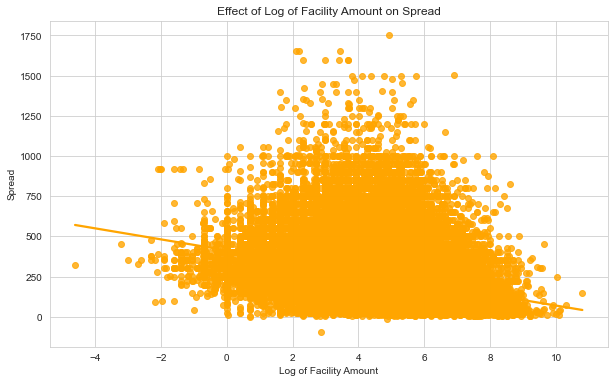

In [122]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Ln_Facility_Amount', y='ALLINDRAWN', data=filtered_df, ci=None, color='orange')
plt.title('Effect of Log of Facility Amount on Spread')
plt.xlabel('Log of Facility Amount')
plt.ylabel('Spread')
plt.show()


In [65]:
facility_df

,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,Altman_z_score,Total_CF,CF_Volatility,BASERATE,FEE,MINBPS,MAXBPS,ALLINDRAWN,ALLINUNDRAWN,Industry
0,14908,19735,14578,NaN,NaN,CenCall Communications Corp,NaN,USA,United States Dollars,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
6,14908,19738,14578,NaN,NaN,CenCall Communications Corp,NaN,USA,United States Dollars,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
12,2015,20145,14840,KOIL,NaN,Kelley Oil Corp,NaN,USA,United States Dollars,Sole Lender,...,NaN,NaN,NaN,LIBOR,NaN,200.0,200.0,200.0,NaN,NaN
14,10909,24511,18185,NaN,NaN,Homedco Group,NaN,USA,United States Dollars,Syndication,...,3.975217,-7.505,74.7562,LIBOR,NaN,125.0,125.0,125.0,NaN,3841.0
21,18232,28551,21170,NaN,NaN,Kumtor Gold Co,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658989,37025,434279,299626,NaN,NaN,Shamrock Foods,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,LIBOR,NaN,150.0,150.0,150.0,22.5,NaN
4658992,95253,442576,304782,JBLU.O,NaN,JetBlue Airways Corp,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,LIBOR,NaN,375.0,375.0,375.0,NaN,NaN
4658993,187829,443363,305342,NaN,NaN,CM Finance SPV Ltd,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4658994,188114,445060,306448,NaN,NaN,BCH Pineridge LLC,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#facility_df.drop_duplicates(subset=['FACILITYID'],keep='first',inplace=True)

In [67]:
facility_df

,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,Altman_z_score,Total_CF,CF_Volatility,BASERATE,FEE,MINBPS,MAXBPS,ALLINDRAWN,ALLINUNDRAWN,Industry
0,14908,19735,14578,NaN,NaN,CenCall Communications Corp,NaN,USA,United States Dollars,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
6,14908,19738,14578,NaN,NaN,CenCall Communications Corp,NaN,USA,United States Dollars,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
12,2015,20145,14840,KOIL,NaN,Kelley Oil Corp,NaN,USA,United States Dollars,Sole Lender,...,NaN,NaN,NaN,LIBOR,NaN,200.0,200.0,200.0,NaN,NaN
14,10909,24511,18185,NaN,NaN,Homedco Group,NaN,USA,United States Dollars,Syndication,...,3.975217,-7.505,74.7562,LIBOR,NaN,125.0,125.0,125.0,NaN,3841.0
21,18232,28551,21170,NaN,NaN,Kumtor Gold Co,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658989,37025,434279,299626,NaN,NaN,Shamrock Foods,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,LIBOR,NaN,150.0,150.0,150.0,22.5,NaN
4658992,95253,442576,304782,JBLU.O,NaN,JetBlue Airways Corp,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,LIBOR,NaN,375.0,375.0,375.0,NaN,NaN
4658993,187829,443363,305342,NaN,NaN,CM Finance SPV Ltd,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4658994,188114,445060,306448,NaN,NaN,BCH Pineridge LLC,NaN,USA,United States Dollars,Syndication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lending decisions

for here I have too look at the lendershare_df. and using the number of facility get the %held by lead arranger. to figure out whether it is lead arranger or not it has other tables with yes and no answers. yes are lead so I can get the lead for each facility there.

In [68]:


facility_lender_df= facility.copy()

lender_share_data = lendershare_df.copy()

facility_lender_df = facility_df.merge(lender_share_data, on='FACILITYID', how='left')

# Filter out the lead arrangers
lead_arrangers = facility_lender_df[facility_lender_df['LEADARRANGERCREDIT'] == 'Yes']

# Group by facility and sum the bank allocations
lead_arranger_allocation = lead_arrangers.groupby('FACILITYID')['BANKALLOCATION'].sum().reset_index()

# Merge this back to get the facility amounts
lead_arranger_allocation = lead_arranger_allocation.merge(facility_df[['FACILITYID', 'FACILITYAMT']], on='FACILITYID', how='left')

# Calculate the percentage held by lead arrangers
lead_arranger_allocation['LeadArrangerPercentage'] = (lead_arranger_allocation['BANKALLOCATION'] / lead_arranger_allocation['FACILITYAMT']) * 100

facility_pricing_df = facility_df.merge(pricing_df, on='FACILITYID', how='left')
facility_performance_pricing_df = facility_pricing_df.merge(perf_df, on='FACILITYID', how='left')

facility_financial_df = facility_df.merge(deal_comp, on='FACILITYID', how='left')

full_data_df = facility_financial_df.merge(
    lead_arranger_allocation[['FACILITYID', 'LeadArrangerPercentage']], 
    on='FACILITYID', 
    how='left'
)

full_data_df['Secured_dummy']=np.where(full_data_df['SECURED']=='Yes',1,np.where(full_data_df['SECURED']=='No',0, np.nan))  # 1 for Secured, 0 for Not Secured

# The loan types of interest
target_loans = ['Revolver/Line < 1 Yr.', 'Revolver/Line >= 1 Yr.']

# Create a dummy variable where 1 indicates one of the target loan types, 0 otherwise
full_data_df['Revolver'] = full_data_df['LOANTYPE'].apply(lambda x: 1 if x in target_loans else 0)




In [69]:
covenant_df.rename(columns={'PackageID':'PACKAGEID'},inplace=True)

full_data_df=full_data_df.merge(covenant_df,on='PACKAGEID',how='right')



# Assuming covenant_df is your DataFrame
# Filter out NaN values in the CovenantType column
full_data_df.dropna(subset=['CovenantType'],inplace=True)

# Count the number of covenants for each facility
covenant_counts = full_data_df.groupby('FACILITYID')['CovenantType'].count().reset_index(name='NumberofCovenants')

# Merge the count back into the original dataframe or another relevant dataframe
# If you need this data back in the original DataFrame, merge it on 'FACILITYID'
full_data_df = full_data_df.merge(covenant_counts, on='FACILITYID', how='left')




In [70]:



full_data_df.loc[full_data_df['SALE'] < 0, 'SALE'] = np.nan

# Add financial ratios calculations
full_data_df.loc[:, 'Ln_sale'] = np.log(full_data_df['SALE'].replace(0, np.nan))


In [71]:
full_data_df.drop(columns=['AT','PRCC_F','CSHO','DLTT','DLC','PSTKL','PSTK','TXDITC','OIBDP','PPENT','NI','LT','EBIT','WCAP','RE','CEQ','OANCF', 'IVNCF', 'FINCF'],axis=1,inplace=True)




In [72]:
import pandas as pd
import numpy as np

# Ensure FACILITYSTARTDATE is a datetime object
full_data_df['FACILITYSTARTDATE'] = pd.to_datetime(full_data_df['FACILITYSTARTDATE'], format='%Y%m%d')

# Sort by company ID and start date
full_data_df = full_data_df.sort_values(by=['BORROWERCOMPANYID', 'FACILITYSTARTDATE'])

# Cumulative count of loans per company
full_data_df['loan_count'] = full_data_df.groupby('BORROWERCOMPANYID').cumcount() + 1

# Shift to find previous loans
full_data_df['previous_loans_by_firm'] = full_data_df.groupby('BORROWERCOMPANYID')['loan_count'].shift(1).fillna(0)

# Calculate ln(1 + previous loans)
full_data_df['ln1+previous_loans_by_firm'] = np.log1p(full_data_df['previous_loans_by_firm'])






In [73]:

# Encode 'Private' as 0, 'Public' as 1, keep NaN as is
lenderinfo_df['Opaque_firm'] = np.where(lenderinfo_df['PUBLICPRIVATE'] == 'Private', 1,
                                                 np.where(lenderinfo_df['PUBLICPRIVATE'] == 'Public', 0, np.nan))



In [74]:
full_data_df = full_data_df.merge(lender_share_data, on='FACILITYID', how='left')
full_data_df

,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,Ln_sale,loan_count,previous_loans_by_firm,ln1+previous_loans_by_firm,COMPANYID_y,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT
0,24.0,171985.0,133119,NaN,NaN,American Airlines Inc,NaN,USA,United States Dollars,Syndication,...,NaN,1,0.0,0.0,1468.0,Credit Suisse First Boston,Documentation agent,NaN,Yes,No
1,24.0,171985.0,133119,NaN,NaN,American Airlines Inc,NaN,USA,United States Dollars,Syndication,...,NaN,1,0.0,0.0,6842.0,Goldman Sachs & Co,Documentation agent,NaN,Yes,No
2,24.0,171985.0,133119,NaN,NaN,American Airlines Inc,NaN,USA,United States Dollars,Syndication,...,NaN,1,0.0,0.0,6895.0,Merrill Lynch & Co Inc,Documentation agent,NaN,Yes,No
3,24.0,171985.0,133119,NaN,NaN,American Airlines Inc,NaN,USA,United States Dollars,Syndication,...,NaN,1,0.0,0.0,30949.0,Citigroup,Admin agent,NaN,Yes,Yes
4,24.0,171985.0,133119,NaN,NaN,American Airlines Inc,NaN,USA,United States Dollars,Syndication,...,NaN,1,0.0,0.0,38939.0,JP Morgan,Syndications agent,NaN,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993473,NaN,NaN,306895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26366,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4993474,NaN,NaN,306986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26367,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4993475,NaN,NaN,306986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26368,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4993476,NaN,NaN,307026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26369,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# If 'COMPANYID_x' is the correct identifier in full_data_df, rename it:
full_data_df.rename(columns={'COMPANYID_x': 'COMPANYID'}, inplace=True)

# If 'COMPANYID' is already correct in lenderinfo_df, no changes are needed there.



In [76]:
# Merge facility and lender share data


# Now merge the lender information
full_data_df = full_data_df.merge(lenderinfo_df[['COMPANYID', 'Opaque_firm']], on='COMPANYID', how='left')



In [77]:
# Drop rows where FACILITYAMT is NaN
full_data_df.dropna(subset=['FACILITYAMT'], inplace=True)


full_data_df.drop_duplicates(subset=['FACILITYID'], inplace=True)

In [78]:
full_data_df

,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,loan_count,previous_loans_by_firm,ln1+previous_loans_by_firm,COMPANYID_y,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT,Opaque_firm
0,24.0,171985.0,133119,NaN,NaN,American Airlines Inc,NaN,USA,United States Dollars,Syndication,...,1,0.0,0.000000,1468.0,Credit Suisse First Boston,Documentation agent,NaN,Yes,No,1.0
6,24.0,171986.0,133119,NaN,5.1403,American Airlines Inc,NaN,USA,United States Dollars,Syndication,...,2,1.0,0.693147,1468.0,Credit Suisse First Boston,Documentation agent,NaN,Yes,No,1.0
12,26.0,89916.0,66617,DHR,NaN,Danaher Corp,NaN,USA,United States Dollars,Syndication,...,1,0.0,0.000000,5851.0,Bank of New York,Participant,5.0000,No,No,1.0
144,26.0,149476.0,117862,DHR,NaN,Danaher Corp,NaN,USA,United States Dollars,Syndication,...,13,12.0,2.564949,5851.0,Bank of New York,Participant,NaN,No,No,1.0
384,26.0,196634.0,149297,DHR,NaN,Danaher Corp,NaN,USA,United States Dollars,Syndication,...,25,24.0,3.218876,5851.0,Bank of New York,Participant,NaN,No,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966108,181751.0,213451.0,159562,NaN,NaN,Vail Holdings Inc,NaN,USA,United States Dollars,Syndication,...,1,0.0,0.000000,6123.0,Wells Fargo Bank,Participant,16.6667,No,No,1.0
4966432,181751.0,266152.0,194206,NaN,NaN,Vail Holdings Inc,NaN,USA,United States Dollars,Syndication,...,37,36.0,3.610918,5854.0,Bank of the West,Participant,NaN,No,No,1.0
4966648,183954.0,226971.0,167983,DAN,NaN,Dana Inc [ex-Dana Holding Corp],NaN,USA,United States Dollars,Syndication,...,1,0.0,0.000000,5925.0,Fifth Third Bank,Participant,NaN,No,No,1.0
4966808,183954.0,267455.0,195065,DAN,NaN,Dana Inc [ex-Dana Holding Corp],NaN,USA,United States Dollars,Syndication,...,21,20.0,3.044522,6123.0,Wells Fargo Bank,Syndications agent,NaN,Yes,Yes,1.0


In [79]:
full_data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where 'FACILITYAMT' is NaN
full_data_df = full_data_df.dropna(subset=['Opaque_firm','ln1+previous_loans_by_firm', 'Secured_dummy'])




In [80]:


full_data_df[['LeadArrangerPercentage','Opaque_firm','ln1+previous_loans_by_firm' ,'Ln_TotalAssets_y', 'Market_to_book_y', 'Leverage_y', 'Secured_dummy', 'Revolver']]

,LeadArrangerPercentage,Opaque_firm,ln1+previous_loans_by_firm,Ln_TotalAssets_y,Market_to_book_y,Leverage_y,Secured_dummy,Revolver
0,0.000000,1.0,0.000000,NaN,NaN,NaN,1.0,1.0
6,0.000000,1.0,0.693147,NaN,NaN,NaN,1.0,0.0
12,0.000006,1.0,0.000000,8.480629,3.878364,0.232203,0.0,1.0
384,0.000000,1.0,3.218876,8.480629,3.878364,0.232203,0.0,1.0
564,0.000003,1.0,3.610918,8.480629,3.878364,0.232203,0.0,0.0
...,...,...,...,...,...,...,...,...
4966108,0.000006,1.0,0.000000,7.080134,1.410499,0.325414,1.0,1.0
4966432,0.000000,1.0,3.610918,7.080134,1.410499,0.325414,1.0,1.0
4966648,0.000000,1.0,0.000000,9.230829,1.052909,0.294700,1.0,1.0
4966808,0.000000,1.0,3.044522,9.230829,1.052909,0.294700,1.0,1.0


In [81]:
full_data_df['ln1+previous_loans_by_firm x Opaque'] = full_data_df['ln1+previous_loans_by_firm'] * full_data_df['Opaque_firm']

# Assuming `MATURITY` column is in months and you want to convert it to days
full_data_df['Maturity_in_days'] = full_data_df['MATURITY'] * 30.44  # Convert months to days

# Calculate the natural logarithm of maturity in days
full_data_df['Ln_Maturity(days)'] = np.log(full_data_df['Maturity_in_days'])

full_data_df['Ln_Facility_Amount']

/var/folders/wf/tw1fjh_n28d7y7w7s6nk5yvh0000gn/T/ipykernel_17424/2660780034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_df['ln1+previous_loans_by_firm x Opaque'] = full_data_df['ln1+previous_loans_by_firm'] * full_data_df['Opaque_firm']
/var/folders/wf/tw1fjh_n28d7y7w7s6nk5yvh0000gn/T/ipykernel_17424/2660780034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_df['Maturity_in_days'] = full_data_df['MATURITY'] * 30.44  # Convert months to days
/var/folders/wf/tw1fjh_n28d7y7w7s6n

0          6.396930
6          5.521461
12         6.214608
384        7.313220
564        8.006368
             ...   
4966108    5.703782
4966432    5.991465
4966648    6.476972
4966808    6.214608
4966948    6.214608
Name: Ln_Facility_Amount, Length: 23400, dtype: float64

In [82]:
# Define the model again after cleaning
X = full_data_df[['Opaque_firm', 'ln1+previous_loans_by_firm','NumberofCovenants', 'Secured_dummy', 'ln1+previous_loans_by_firm x Opaque','Ln_Maturity(days)','Ln_Facility_Amount','Ln_sale']]
Y = full_data_df['LeadArrangerPercentage']

# Adding constant term again
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(Y, X, missing='drop').fit(cov_type='HC1')  # ensures any remaining NaNs are dropped

# View the summary of the regression results
print(f'Whole data before separating the 2 industries:{model.summary()}')

Whole data before separating the 2 industries:                              OLS Regression Results                              
Dep. Variable:     LeadArrangerPercentage   R-squared:                       0.010
Model:                                OLS   Adj. R-squared:                  0.010
Method:                     Least Squares   F-statistic:                     12.32
Date:                    Sat, 27 Apr 2024   Prob (F-statistic):           9.63e-18
Time:                            09:05:36   Log-Likelihood:                 56576.
No. Observations:                   16547   AIC:                        -1.131e+05
Df Residuals:                       16538   BIC:                        -1.131e+05
Df Model:                               8                                         
Covariance Type:                      HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------

In [83]:
# Filter for mining and manufacturing industries
min_df = full_data_df[(full_data_df['SIC_x'] >= 1000) & (full_data_df['SIC_x'] <= 1499)]
manu_df = full_data_df[(full_data_df['SIC_x'] >= 2000) & (full_data_df['SIC_x'] <= 3999)]



In [84]:
print('Mining Summary statistics:')

min_df[['FacilityAmount(m)','Opaque_firm','MATURITY', 'SALE','ln1+previous_loans_by_firm', 'Secured_dummy']].describe()




Mining Summary statistics:


,FacilityAmount(m),Opaque_firm,MATURITY,SALE,ln1+previous_loans_by_firm,Secured_dummy
count,1022.000000,1022.000000,1022.000000,1021.000000,1022.000000,1022.000000
mean,497.699773,0.825832,47.930528,1333.162088,3.387442,0.773973
std,834.259875,0.379440,19.141365,4267.925787,1.966048,0.418462
min,0.344937,0.000000,2.000000,0.151000,0.000000,0.000000
25%,82.937500,1.000000,36.000000,113.174000,2.397895,1.000000
50%,250.000000,1.000000,53.500000,357.677000,3.891820,1.000000
75%,600.000000,1.000000,60.000000,989.975000,4.890349,1.000000
max,15000.000000,1.000000,122.000000,42613.000000,6.613384,1.000000


In [85]:
min_df['FacilityAmount(m)']

34391       100.0
34535       100.0
34727       150.0
35015       275.0
35303       250.0
            ...  
4954008     450.0
4954519      10.0
4954546      70.0
4960374    1500.0
4961881     600.0
Name: FacilityAmount(m), Length: 1022, dtype: float64

In [101]:
print('Manufactoring Summary statistics:')

manu_df[['FacilityAmount(m)','Opaque_firm','MATURITY', 'SALE','ln1+previous_loans_by_firm', 'Secured_dummy']].describe()




Manufactoring Summary statistics:


,FacilityAmount(m),Opaque_firm,MATURITY,SALE,ln1+previous_loans_by_firm,Secured_dummy
count,6195.000000,6195.000000,6195.000000,6186.000000,6195.000000,6195.000000
mean,319.133878,0.801614,49.931073,2697.112761,3.274478,0.739306
std,629.681394,0.398816,22.502874,8047.983853,2.026402,0.439049
min,0.010000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,36.000000,229.241000,1.945910,0.000000
50%,150.000000,1.000000,60.000000,731.416000,3.713572,1.000000
75%,350.000000,1.000000,60.000000,1955.100000,4.890349,1.000000
max,22500.000000,1.000000,240.000000,175353.000000,7.305860,1.000000


In [87]:
# Define the model for mining
X_min = min_df[['Opaque_firm', 'ln1+previous_loans_by_firm','NumberofCovenants', 'Secured_dummy', 'ln1+previous_loans_by_firm x Opaque', 'Ln_Maturity(days)', 'Ln_sale']]
X_min = sm.add_constant(X_min)  # adding a constant
Y_min = min_df['Ln_Facility_Amount']

# Fitting the model for mining
model_min = sm.OLS(Y_min, X_min, missing='drop').fit(cov_type='HC1')
print("Mining Industry Regression Results:")
print(model_min.summary())

# Define the model for manufacturing
X_manu = manu_df[['Opaque_firm', 'ln1+previous_loans_by_firm','NumberofCovenants', 'Secured_dummy', 'ln1+previous_loans_by_firm x Opaque', 'Ln_Maturity(days)', 'Ln_sale']]
X_manu = sm.add_constant(X_manu)  # adding a constant
Y_manu = manu_df['Ln_Facility_Amount']

# Fitting the model for manufacturing
model_manu = sm.OLS(Y_manu, X_manu, missing='drop').fit(cov_type='HC1')
print("\nManufacturing Industry Regression Results:")
print(model_manu.summary())



Mining Industry Regression Results:
                            OLS Regression Results                            
Dep. Variable:     Ln_Facility_Amount   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     75.48
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           5.67e-88
Time:                        09:05:36   Log-Likelihood:                -1699.8
No. Observations:                1021   AIC:                             3416.
Df Residuals:                    1013   BIC:                             3455.
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [88]:
covenant_df

,PACKAGEID,CovenantType
0,4106,Min. Current Ratio
1,4106,Min. Interest Coverage
2,4812,Min. Current Ratio
3,4952,Max. Debt to EBITDA
4,5223,Max. Senior Debt to EBITDA
...,...,...
80856,306895,Max. Debt to EBITDA
80857,306986,Max. Debt to Equity
80858,306986,Min. Interest Coverage
80859,307026,Max. Debt to EBITDA


In [89]:
facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91118 entries, 0 to 91117
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BORROWERCOMPANYID     91118 non-null  int64  
 1   FACILITYID            91118 non-null  int64  
 2   PACKAGEID             91118 non-null  int64  
 3   TICKER                27543 non-null  object 
 4   AVERAGELIFE           7560 non-null   float64
 5   COMPANY               91118 non-null  object 
 6   CONVERSIONDATE        370 non-null    float64
 7   COUNTRYOFSYNDICATION  91118 non-null  object 
 8   CURRENCY              91118 non-null  object 
 9   DISTRIBUTIONMETHOD    90829 non-null  object 
 10  EXCHANGERATE          91118 non-null  float64
 11  FACILITYAMT           91116 non-null  float64
 12  FACILITYENDDATE       91118 non-null  int64  
 13  FACILITYSTARTDATE     91118 non-null  int64  
 14  LCLIMIT               0 non-null      float64
 15  LOANTYPE           

In [90]:
lenderinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148318 entries, 0 to 148317
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   COMPANYID         148318 non-null  int64  
 1   TICKER            12803 non-null   object 
 2   CITY              72864 non-null   object 
 3   COMPANY           148318 non-null  object 
 4   COUNTRY           148317 non-null  object 
 5   INSTITUTIONTYPE   98933 non-null   object 
 6   PARENTID          22294 non-null   float64
 7   PRIMARYSICCODE    112556 non-null  float64
 8   PUBLICPRIVATE     80286 non-null   object 
 9   REGION            145430 non-null  object 
 10  SALES             19680 non-null   float64
 11  SECONDARYSICCODE  18423 non-null   float64
 12  STATE             43532 non-null   object 
 13  TERTIARYSICCODE   7760 non-null    float64
 14  ULTIMATEPARENTID  148272 non-null  float64
 15  ZIPCODE           50606 non-null   object 
 16  Opaque_firm       80

In [91]:
lenderinfo_df

,COMPANYID,TICKER,CITY,COMPANY,COUNTRY,INSTITUTIONTYPE,PARENTID,PRIMARYSICCODE,PUBLICPRIVATE,REGION,SALES,SECONDARYSICCODE,STATE,TERTIARYSICCODE,ULTIMATEPARENTID,ZIPCODE,Opaque_firm
0,1,NaN,Boston,IBC Acquisitions,USA,NaN,NaN,6799.0,Private,North America,NaN,NaN,Massachusetts,NaN,1.0,NaN,1.0
1,2,NaN,New York,UIS Inc,USA,NaN,NaN,3714.0,Private,North America,NaN,2064.0,New York,3322.0,2.0,NaN,1.0
2,3,NaN,San Francisco,Chatswood Inc,USA,NaN,NaN,6799.0,Private,North America,NaN,NaN,California,NaN,3.0,NaN,1.0
3,4,NaN,Petersburg,American Community Development Group,USA,NaN,NaN,6553.0,Private,North America,NaN,NaN,Florida,NaN,4.0,NaN,1.0
4,6,NaN,Dallas,Hoker Broadcasting,USA,NaN,NaN,4832.0,Private,North America,NaN,NaN,Texas,NaN,6.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148313,188848,NaN,NaN,Coastal Housing Group ltd,United Kingdom,Corporation,NaN,NaN,Private,Europe,NaN,NaN,NaN,NaN,188848.0,SA1 1NW,1.0
148314,188849,NaN,NaN,SIAT NV,Belgium,NaN,NaN,NaN,Private,Europe,NaN,NaN,NaN,NaN,188849.0,NaN,1.0
148315,188850,NaN,Antwerp,DPG Media Group NV,Belgium,NaN,NaN,NaN,Private,Europe,NaN,NaN,NaN,NaN,188850.0,NaN,1.0
148316,188851,NaN,ProMach,ProMach,USA,NaN,NaN,NaN,Private,North America,NaN,NaN,Ohio,NaN,188851.0,NaN,1.0


In [92]:
facility

filtered_facility=facility[facility['DISTRIBUTIONMETHOD']=='Syndication']

filtered_facility

,BORROWERCOMPANYID,FACILITYID,PACKAGEID,TICKER,AVERAGELIFE,COMPANY,CONVERSIONDATE,COUNTRYOFSYNDICATION,CURRENCY,DISTRIBUTIONMETHOD,...,FACILITYSTARTDATE,LCLIMIT,LOANTYPE,MATURITY,PRIMARYPURPOSE,RENEWAL,SECONDARYPURPOSE,SECURED,SENIORITY,TARGETCOMPANY
3,10909,24511,18185,NaN,NaN,Homedco Group,NaN,USA,United States Dollars,Syndication,...,19970503,NaN,Term Loan,24.0,Acquis. line,NaN,NaN,NaN,Senior,NaN
4,18232,28551,21170,NaN,NaN,Kumtor Gold Co,NaN,USA,United States Dollars,Syndication,...,19971010,NaN,Term Loan,60.0,Proj. finance,NaN,NaN,NaN,Senior,NaN
5,15855,42451,31844,GC,NaN,GranCare Inc,NaN,USA,United States Dollars,Syndication,...,19970212,NaN,Revolver/Line >= 1 Yr.,60.0,Recap.,NaN,Acquis. line,Yes,Senior,NaN
6,15855,42452,31844,GC,3.6519,GranCare Inc,NaN,USA,United States Dollars,Syndication,...,19970212,NaN,Term Loan,60.0,Takeover,NaN,Debt Repay.,Yes,Senior,NaN
7,3696,42659,32044,NaN,NaN,KinderCare Learning Centers,NaN,USA,United States Dollars,Syndication,...,19970213,NaN,Revolver/Line >= 1 Yr.,84.0,LBO,NaN,Debt Repay.,Yes,Senior,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91113,37025,434279,299626,NaN,NaN,Shamrock Foods,NaN,USA,United States Dollars,Syndication,...,20131001,NaN,Revolver/Line >= 1 Yr.,36.0,Corp. purposes,NaN,NaN,NaN,Senior,NaN
91114,95253,442576,304782,JBLU.O,NaN,JetBlue Airways Corp,NaN,USA,United States Dollars,Syndication,...,20130423,NaN,Revolver/Line >= 1 Yr.,36.0,Corp. purposes,NaN,NaN,Yes,Senior,NaN
91115,187829,443363,305342,NaN,NaN,CM Finance SPV Ltd,NaN,USA,United States Dollars,Syndication,...,20130523,NaN,Term Loan,55.0,Corp. purposes,NaN,NaN,NaN,Senior,NaN
91116,188114,445060,306448,NaN,NaN,BCH Pineridge LLC,NaN,USA,United States Dollars,Syndication,...,20120705,NaN,Term Loan,60.0,Real estate,NaN,NaN,NaN,Senior,NaN


In [93]:
lendershare_df

,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT
0,19735,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes
1,19738,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes
2,20145,8980,Mitsui Leasing USA,Agent,100.0,Yes,Yes
3,24511,2446,Union Bank NA,Participant,NaN,No,No
4,24511,5893,Citibank,Participant,NaN,No,No
...,...,...,...,...,...,...,...
521221,443363,30255,UBS AG,Admin agent,NaN,Yes,Yes
521222,445060,100864,First Bank of Highland Park,Participant,NaN,No,No
521223,445060,123561,Private Bank & Trust Co,Admin agent,NaN,Yes,Yes
521224,445061,100864,First Bank of Highland Park,Participant,NaN,No,No


In [94]:
lendershare_df[lendershare_df['LEADARRANGERCREDIT']=='Yes']

,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT
0,19735,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes
1,19738,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes
2,20145,8980,Mitsui Leasing USA,Agent,100.0,Yes,Yes
9,24511,7829,BNP Paribas [Ex-Banque Paribas],Agent,NaN,Yes,Yes
15,28551,5889,Chase Manhattan Bank,Admin agent,NaN,Yes,Yes
...,...,...,...,...,...,...,...
521219,434279,127349,Bank of America Merrill Lynch,Admin agent,NaN,Yes,Yes
521220,442576,68290,Citibank NA,Admin agent,NaN,Yes,Yes
521221,443363,30255,UBS AG,Admin agent,NaN,Yes,Yes
521223,445060,123561,Private Bank & Trust Co,Admin agent,NaN,Yes,Yes


In [95]:
lendershare_df['FACILITYID'].nunique()


90968

In [96]:
lendershare_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521226 entries, 0 to 521225
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FACILITYID          521226 non-null  int64  
 1   COMPANYID           521226 non-null  int64  
 2   LENDER              521226 non-null  object 
 3   LENDERROLE          521226 non-null  object 
 4   BANKALLOCATION      142075 non-null  float64
 5   AGENTCREDIT         520905 non-null  object 
 6   LEADARRANGERCREDIT  521166 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.8+ MB


In [97]:
merge_df= pd.merge(lendershare_df,facility_df, on=['FACILITYID','COMPANYID'], how='left')

merge_df


,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT,BORROWERCOMPANYID,PACKAGEID,TICKER,...,Altman_z_score,Total_CF,CF_Volatility,BASERATE,FEE,MINBPS,MAXBPS,ALLINDRAWN,ALLINUNDRAWN,Industry
0,19735,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes,14908.0,14578.0,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
1,19738,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes,14908.0,14578.0,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
2,20145,8980,Mitsui Leasing USA,Agent,100.0,Yes,Yes,2015.0,14840.0,KOIL,...,NaN,NaN,NaN,LIBOR,NaN,200.0,200.0,200.0,NaN,NaN
3,24511,2446,Union Bank NA,Participant,NaN,No,No,10909.0,18185.0,NaN,...,3.975217,-7.505,74.7562,LIBOR,NaN,125.0,125.0,125.0,NaN,3841.0
4,24511,5893,Citibank,Participant,NaN,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521221,443363,30255,UBS AG,Admin agent,NaN,Yes,Yes,187829.0,305342.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521222,445060,100864,First Bank of Highland Park,Participant,NaN,No,No,188114.0,306448.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521223,445060,123561,Private Bank & Trust Co,Admin agent,NaN,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521224,445061,100864,First Bank of Highland Park,Participant,NaN,No,No,188114.0,306448.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
merge_df[merge_df['LEADARRANGERCREDIT']=='Yes']

,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT,BORROWERCOMPANYID,PACKAGEID,TICKER,...,Altman_z_score,Total_CF,CF_Volatility,BASERATE,FEE,MINBPS,MAXBPS,ALLINDRAWN,ALLINUNDRAWN,Industry
0,19735,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes,14908.0,14578.0,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
1,19738,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes,14908.0,14578.0,NaN,...,NaN,NaN,NaN,LIBOR,NaN,350.0,350.0,350.0,NaN,NaN
2,20145,8980,Mitsui Leasing USA,Agent,100.0,Yes,Yes,2015.0,14840.0,KOIL,...,NaN,NaN,NaN,LIBOR,NaN,200.0,200.0,200.0,NaN,NaN
9,24511,7829,BNP Paribas [Ex-Banque Paribas],Agent,NaN,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,28551,5889,Chase Manhattan Bank,Admin agent,NaN,Yes,Yes,18232.0,21170.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521219,434279,127349,Bank of America Merrill Lynch,Admin agent,NaN,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521220,442576,68290,Citibank NA,Admin agent,NaN,Yes,Yes,95253.0,304782.0,JBLU.O,...,NaN,NaN,NaN,LIBOR,NaN,375.0,375.0,375.0,NaN,NaN
521221,443363,30255,UBS AG,Admin agent,NaN,Yes,Yes,187829.0,305342.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521223,445060,123561,Private Bank & Trust Co,Admin agent,NaN,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
lendershare_df[lendershare_df['FACILITYID']== 19735]

,FACILITYID,COMPANYID,LENDER,LENDERROLE,BANKALLOCATION,AGENTCREDIT,LEADARRANGERCREDIT
0,19735,5889,Chase Manhattan Bank,Agent,NaN,Yes,Yes


In [100]:
merge_df2[merge_df2['FACILITYID']== 19735]


NameError: name 'merge_df2' is not defined

In [ ]:
lendershare_df[lendershare_df['FACILITYID']== 443363]

In [ ]:
merge_df[merge_df['FACILITYID']== 443363]


In [ ]:
nn=merge_df2[merge_df2['FACILITYID']== 445060]

nn[['FACILITYID','FACILITYAMT','BANKALLOCATION']]

In [ ]:
lendershare_df[lendershare_df['FACILITYID']== 445060]


In [ ]:
lendershare_df[lendershare_df['FACILITYID']== 445061]

In [ ]:
merge_df2[merge_df2['FACILITYID']== 445061]



In [ ]:
#Lead arranger,Co-lead arranger,Mandated Lead arranger

In [ ]:
# Create 'Opaque_firm' dummy variable based on 'PUBLICPRIVATE' column
lenderinfo_df['Opaque_firm'] = np.where(lenderinfo_df['PUBLICPRIVATE'] == 'Private', 1,
                                        np.where(lenderinfo_df['PUBLICPRIVATE'] == 'Public', 0,
                                                 np.where(pd.isna(lenderinfo_df['PUBLICPRIVATE']), np.nan, np.nan)))


In [ ]:
lenderinfo_df

In [ ]:
merge_df2=pd.merge(lenderinfo_df,merge_df, on=['COMPANYID','COMPANY'],how='right')
merge_df2['NumLenders']

In [ ]:
merge_df2.duplicated().any()

In [ ]:
facility['DISTRIBUTIONMETHOD']

In [ ]:
# Convert the LEADARRANGERCREDIT column to a boolean where 'Yes' is True and 'No' is False
merge_df2['IsLeadArranger'] = merge_df2['LEADARRANGERCREDIT'] == 'Yes'

# Calculate the total facility amount for lead arrangers for each FACILITYID
lead_arranger_total = merge_df2[merge_df2['IsLeadArranger']].groupby('FACILITYID')['FACILITYAMT'].sum()
lead_arranger_total.nunique()

In [ ]:
merge_df2['FACILITYAMT'].nunique()

In [ ]:
mm=merge_df2[merge_df2['LEADARRANGERCREDIT'] == 'Yes']

mm['FACILITYAMT'].nunique()



In [ ]:
facility



In [ ]:
merge_df[merge_df['BORROWERCOMPANYID']==188114]

In [ ]:
nnn=merge_df[['FACILITYID','BORROWERCOMPANYID','LEADARRANGERCREDIT']]

merge_df[merge_df['FACILITYID']==19735]

In [ ]:
nnn

In [ ]:
merge_df['BORROWERCOMPANYID'].nunique()

In [ ]:
merge_df['FACILITYID'].nunique()

In [ ]:
lenderinfo_df